In [11]:
import numpy as np
from sklearn.metrics import euclidean_distances
import pandas as pd
from sklearn.metrics import classification_report

import sys
sys.path.insert(0, '../SOM-LVQ')
import SOM_LVQ
from minisom import MiniSom
from supervisedSom import supervisedSom
import weighted_neurons

In [12]:
data = pd.read_csv(r"../data/UCI/dermatology.data.csv", header=None)
x = data.iloc[:, 0:33].values
y = data[34].values
y[y==6] = 0
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

# use Minmaxscaler because we use euclidean distance
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

C:\Users\Thend\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
models = []
mappings = []
propa = []

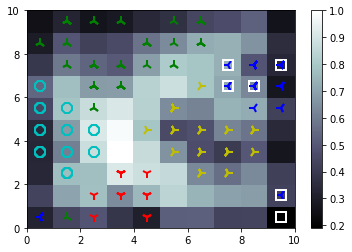

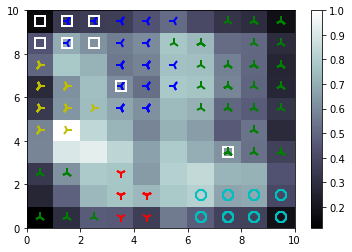

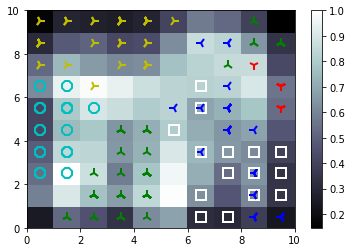

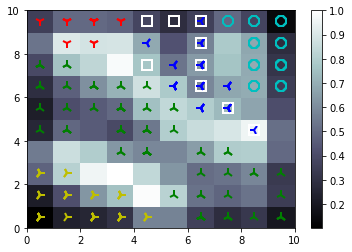

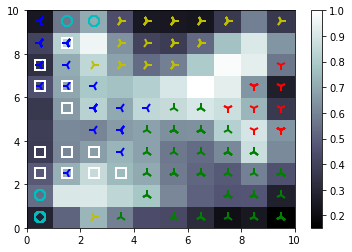

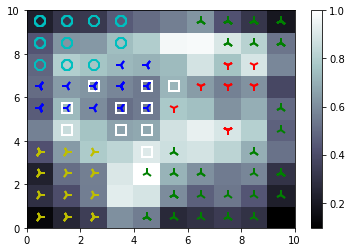

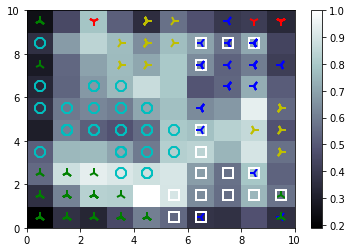

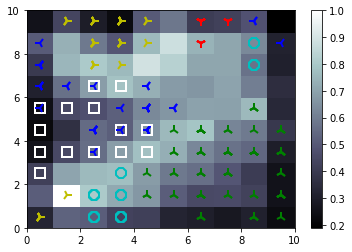

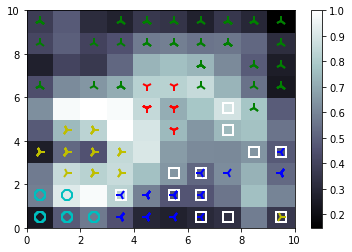

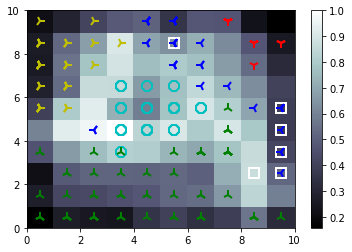

In [14]:
for i in range(10):
    som = MiniSom(x = 10, y = 10, input_len = 33, sigma = 1.0, learning_rate = 0.5)
    som.random_weights_init(x_train)
    som.train_random(data = x_train, num_iteration = 100)
    suso = supervisedSom(som, x_train, y_train)
    label = suso.visualSom()
    taggings = suso.taggingSom()
    p_vectors = SOM_LVQ.init_LVQ_pvectors(som, taggings, x_train, y_train)
    lvq = SOM_LVQ.SOM_LVQ(x_train, y_train, n_classes=6, n_neurons=35, p_vectors=p_vectors, epsilon=0.9, epsilon_dec_factor=0.001)
    neurons = lvq.train_LVQ_neighbors(x_train, y_train)
    models.append(lvq)
    mappings.append(lvq.win_map_LVQ(x_train))
    propa.append(lvq.propabilityLVQ())

In [15]:
tmp_result = []
for sample in x_test:
    t = weighted_neurons.weighted_neurons_predict(models, mappings, propa, y = sample)
    tmp_result.append(t)

In [16]:
print (classification_report(y_test, tmp_result, target_names=['0', '1', '2', '3', '4', '5', '6']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00        27
          2       0.93      0.88      0.90        16
          3       1.00      1.00      1.00        21
          4       0.87      0.93      0.90        14
          5       1.00      1.00      1.00        12

avg / total       0.97      0.97      0.97        92



C:\Users\Thend\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 6, does not match size of target_names, 7
  .format(len(labels), len(target_names))
